<a href="https://colab.research.google.com/github/arshiyasaiyad/Calculator/blob/main/Feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6942 - accuracy: 0.8143 - val_loss: 0.3386 - val_accuracy: 0.9021
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3106 - accuracy: 0.9111 - val_loss: 0.2709 - val_accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2569 - accuracy: 0.9262 - val_loss: 0.2314 - val_accuracy: 0.9328
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2232 - accuracy: 0.9356 - val_loss: 0.2033 - val_accuracy: 0.9410
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1988 - accuracy: 0.9429 - val_loss: 0.1914 - val_accuracy: 0.9444
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1800 - accuracy: 0.9478 - val_loss: 0.1730 - val_accuracy: 0.9498
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step -

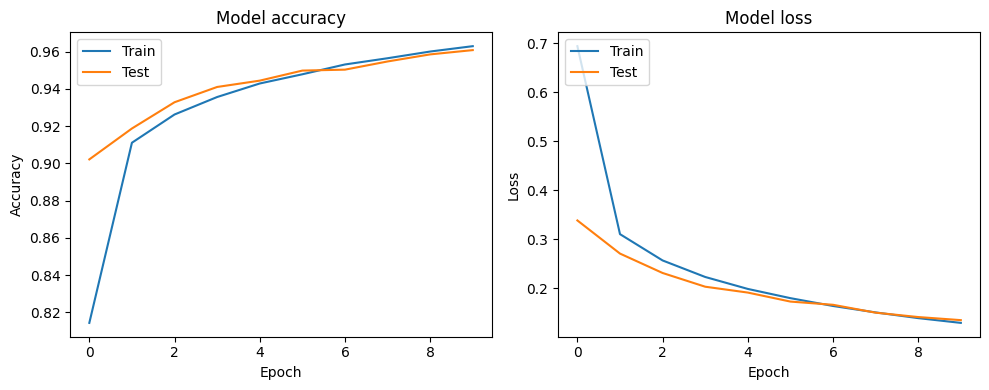

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

test_loss, test_accuracy=model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy*100:.2f}%')
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()
